## **MAIN QUEST_문제 1**. 이미지 분류 모델을 만들고, 전체 코드와 분류 결과를 주피터 노트북 파일로 자신의 깃헙에 제출합니다.(3점) ❤❤❤


**주의 및 안내사항 **

1. 이미지 데이터를 적절히 전처리 한 후 데이터 파이프라인을 설계합니다.
2. 텐서플로우 라이브러리에서 모델을 불러오지 않고, 직접 모델 학습 코드를 짜야 합니다.

3. Data augmentation 등 케창딥에서 배운 모든 방법을 사용해 최고 기록을 달성해보세요.

**선택한 Model **
* 모델은 CNN Model 중 ResNet-50을 선택하였습니다.



# 이미지 전처리 (PreProcessing)

* 훈련 데이터 전체에 대해, 각 픽셀에 들어갈 값이 평균 0이 되도록 합니다. 즉, 전체 이미지를 더하고 갯수로 나눠 '평균 이미지'를 구하고, 이 이미지를 모든 이미지에서 빼 줍니다.

[1] 라이브러리 import

In [23]:
import pandas as pd #프레임 안의 데이터 타입을 참고해서 테이블데이터를 다루기 위해 사용하기 위함
import os #파일 안에 있는 데이터를 불러오기 위해 사용함
import glob
import tensorflow as tf

from keras.applications import ResNet50V2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator #함수를 통해 이미지 로드 및 이미지 크기 조절 가능
import cv2 #image 출력(보간)

import keras
import seaborn as sns #시각화 패키지 미리 세팅

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential



[2] 데이터 수집  (캐글 데이터 : train, test, val) -> data set  분리 -> 파일 경로 저장


In [24]:
path = "/content/sample_data/chest_xray"


[2]-1 분리한 data set 별로 저장 -> 3개 data set를 각 normal, pneumonia 폴더로 나누어서 6개 이미지 data set으로 분류



*   pneumonia_train_images : 훈련 폐렴 이미지
*   normal_train_images : 훈련 정상 이미지



*   pneumonia_val_images : 검증 폐렴 이미지
*   normal_val_images : 검증 정상 이미지



*   pneumonia_test_images : 테스트 폐렴 이미지
*   normal_test_images : 테스트 정상 이미지


In [25]:
train_path = os.path.join(path,"train")
test_path = os.path.join(path,"test")
val_path = os.path.join(path,"val")

pneumonia_train_images = glob.glob (train_path+"/PNEUMONIA/*.jpeg")
normal_train_images =glob.glob (train_path+"/NORMAL/*.jpeg")

pneumonia_val_images = glob.glob (val_path+"/PNEUMONIA/*.jpeg")
normal_val_images =glob.glob (val_path+"/NORMAL/*.jpeg")

pneumonia_test_images = glob.glob (test_path+"/PNEUMONIA/*.jpeg")
normal_test_images =glob.glob (test_path+"/NORMAL/*.jpeg")


[2]-2
폐렴 or 정상 columns에 하단과 같이 부여하고 데이터 변수로 저장

- 훈련 정상 데이터 : 1
- 훈련 폐렴 데이터 : 2


In [33]:
data1 = pd.DataFrame(np.concatenate([[1]*len(normal_train_images), [2]*len(pneumonia_train_images)]), columns=["class"]) #pandas dataframe type 사용

[3] 데이터 전처리

[3]-1. 데이터 시각화

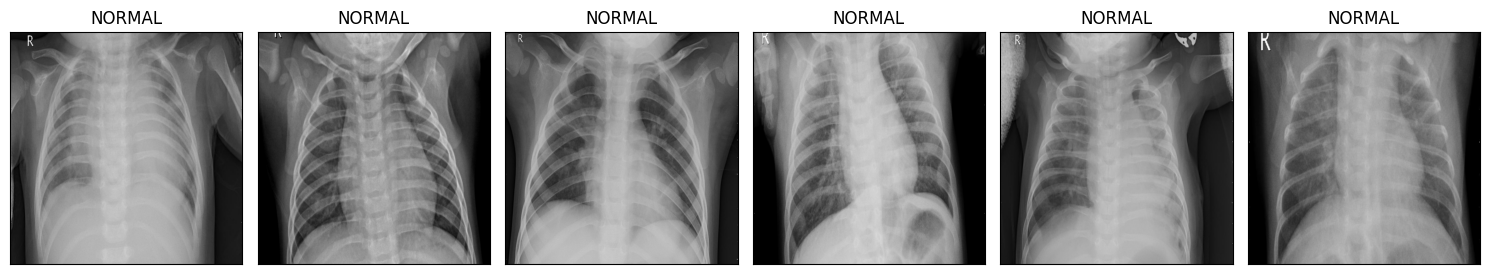

In [54]:
#normal train image x-ray classfication 시각화

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
  img = cv2.imread(normal_train_images[i])
  img = cv2.resize(img, (512, 512))
  ax.imshow(img)
  ax.set_title("NORMAL")
fig.tight_layout()
plt.show()


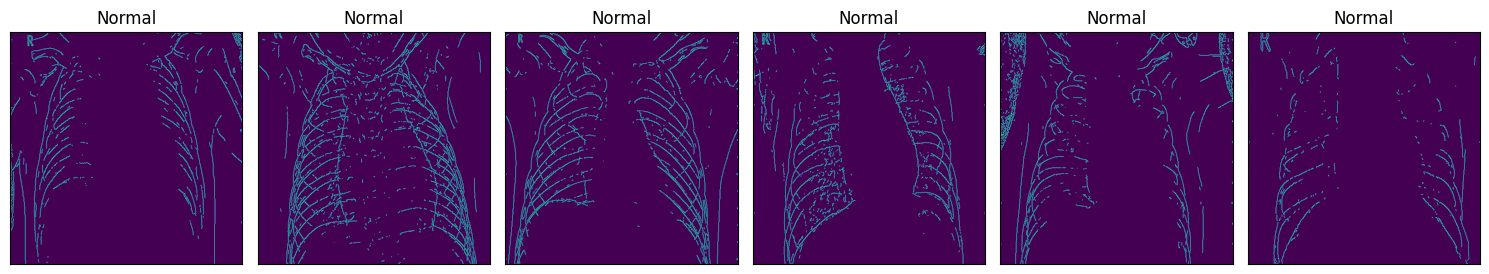

In [52]:
#train xray -> born 추출 (정상)

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
  img = cv2.imread(normal_train_images[i])
  img = cv2.resize(img, (512, 512))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.Canny(img, 80, 100)
  ax.imshow(img)
  ax.set_title("Normal")
fig.tight_layout()
plt.show()

In [57]:
#이미지 증강  (ImageDataGenerator로 데이터 확대를 위한 데이터 생성)

train_Datagen = ImageDataGenerator(
    rescale=1/255,
    zoom_range= 0.2,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(
   rescale=1/255
)

[4] Modeling

In [61]:
input_shape = (512, 512,3) #3차원으로 array input gogo~

layer_model =tf.keras.applications.ResNet50V2(weights='imagenet', input_shape=input_sh, include_top=False)

for layer in layer_model.layers:
  layer.trainable = False

model = Sequential()
model.add(layer_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation ='relu', kernel_regularizer=keras.regularizers.l2(l2=0.1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()


94668760/94668760 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 16, 16, 2048)      23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,827,201
Trainable params: 262,401
Non-tr

In [63]:
#test data -> val data

train_generator=train_Datagen.flow_from_directory(
    train_path,
    target_size=(512,512),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size=(512,512),
    batch_size=32,
    class_mode='binary'
)
test_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(512,512),
    batch_size=32,
    class_mode='binary'
)


Found 2544 images belonging to 3 classes.
Found 624 images belonging to 3 classes.
Found 16 images belonging to 3 classes.


[5] 모델학습 (epochs = 10)

In [65]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

initial_learning_rate =1e-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=755,
    decay_rate=0.9,
    staircase=True)

model.compile(optimizer= Adam(lr_schedule), loss='binary_crossentropy', metrics=["accuracy"])

history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch= 4834 //32,
                    validation_data = validation_generator,
                    validation_steps = 624 // 32)


Epoch 1/10
 80/151 [==============>...............] - ETA: 37:57 - loss: -114.5559 - accuracy: 0.2449

151/151 [==============================] - 3155s 21s/step - loss: -114.5559 - accuracy: 0.2449 - val_loss: -257.2910 - val_accuracy: 0.3783


[6] 모델평가

In [68]:
model.evaluate(test_generator)[1]

1/1 [==============================] - 15s 15s/step - loss: 39.9715 - accuracy: 1.0000


1.0

In [67]:
model.evaluate(validation_generator)[1]

20/20 [==============================] - 593s 30s/step - loss: -258.4808 - accuracy: 0.3750


0.375

**Epochs =10 일때, **



*  test data 정확도 : 100%
*  val data 정확도 : 40%

[5]-1 모델학습 (epochs =4)

In [69]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

initial_learning_rate =1e-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=755,
    decay_rate=0.9,
    staircase=True)

model.compile(optimizer= Adam(lr_schedule), loss='binary_crossentropy', metrics=["accuracy"])

history = model.fit(train_generator,
                    epochs=4,
                    steps_per_epoch= 4834 //32,
                    validation_data = validation_generator,
                    validation_steps = 624 // 32)


Epoch 1/4
 80/151 [==============>...............] - ETA: 37:07 - loss: -559.3882 - accuracy: 0.2453

151/151 [==============================] - 3080s 20s/step - loss: -559.3882 - accuracy: 0.2453 - val_loss: -708.5969 - val_accuracy: 0.3766


In [70]:
#Training 시각화

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(accuracy, label = "Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.ylim(0.8,1)
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.ylim(0.0.5)
plt.legend()
plt.title("Training and Validation loss")

plt.show()

In [76]:
#test & val data check again

model.evaluate(validation_generator)[1]

model.evaluate(test_generator)[1]

1/1 [==============================] - 15s 15s/step - loss: 141.7851 - accuracy: 1.0000


1.0

# validation accuracy : 40%
# test accuracy : 100%